In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [24]:
df=pd.read_csv('/home/q/Desktop/ironhack/proj8/global_power_plant_database.csv', sep=',')

### df

In [4]:
(df.isna().sum()/df.shape[0])*100

country                      0.000000
country_long                 0.000000
name                         0.000000
gppd_idnr                    0.000000
capacity_mw                  0.000000
latitude                     0.000000
longitude                    0.000000
primary_fuel                 0.000000
other_fuel1                 93.436978
other_fuel2                 98.986961
other_fuel3                 99.652290
commissioning_year          45.493146
owner                       34.700769
source                       0.050150
url                          0.060181
geolocation_source           1.400869
wepp_id                     45.232364
year_of_capacity_data       54.052156
generation_gwh_2013         76.609829
generation_gwh_2014         75.125376
generation_gwh_2015         72.771648
generation_gwh_2016         70.006687
generation_gwh_2017         69.197593
estimated_generation_gwh    27.144768
dtype: float64

In [5]:
df.shape[0]

29910

In [25]:
df.drop(columns= ['url','wepp_id','commissioning_year'],inplace=True)


In [26]:
df.drop(columns= ['gppd_idnr','country','owner','source','geolocation_source'],inplace=True)


### df.head()

In [11]:
#(df['capacity_mw']/df['/generation_gwh_2013']).

In [12]:
df.dtypes

country_long                 object
name                         object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
estimated_generation_gwh    float64
dtype: object

In [13]:
df.columns

Index(['country_long', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

In [14]:
df.capacity_mw.value_counts

<bound method IndexOpsMixin.value_counts of 0         33.00
1         66.00
2        100.00
3         11.55
4         42.00
          ...  
29905     50.00
29906     20.00
29907    108.00
29908    920.00
29909    750.00
Name: capacity_mw, Length: 29910, dtype: float64>

In [15]:
df.primary_fuel.value_counts()

Hydro             7155
Solar             5929
Wind              5188
Gas               3922
Coal              2390
Oil               2290
Biomass           1396
Waste             1087
Nuclear            198
Geothermal         189
Storage             58
Other               44
Cogeneration        41
Petcoke             13
Wave and Tidal      10
Name: primary_fuel, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_long              29910 non-null  object 
 1   name                      29910 non-null  object 
 2   capacity_mw               29910 non-null  float64
 3   latitude                  29910 non-null  float64
 4   longitude                 29910 non-null  float64
 5   primary_fuel              29910 non-null  object 
 6   other_fuel1               1963 non-null   object 
 7   other_fuel2               303 non-null    object 
 8   other_fuel3               104 non-null    object 
 9   year_of_capacity_data     13743 non-null  float64
 10  generation_gwh_2013       6996 non-null   float64
 11  generation_gwh_2014       7440 non-null   float64
 12  generation_gwh_2015       8144 non-null   float64
 13  generation_gwh_2016       8971 non-null   float64
 14  genera

In [17]:
(df.estimated_generation_gwh.isna().sum())/df.shape[0]

0.2714476763624206

In [18]:
df1 = df.loc[df.generation_gwh_2013.isna()==False].copy()
df1.shape

(6996, 16)

In [19]:
df1.reset_index(drop=True, inplace=True)

In [20]:
(df1.isna().sum())/df1.shape[0]

country_long                0.000000
name                        0.000000
capacity_mw                 0.000000
latitude                    0.000000
longitude                   0.000000
primary_fuel                0.000000
other_fuel1                 0.781018
other_fuel2                 0.959119
other_fuel3                 0.985277
year_of_capacity_data       0.039308
generation_gwh_2013         0.000000
generation_gwh_2014         0.014723
generation_gwh_2015         0.013007
generation_gwh_2016         0.015294
generation_gwh_2017         0.017439
estimated_generation_gwh    0.985277
dtype: float64

In [ ]:
##   Drop columns with null values more than 50%
##   Remove other_fuel 1, 2, and 3 and will replace when model is created
##   Select a feature to use as Target. Meaning, what you want to predict
##   Explore data again: Check for correlation 
##   Split data to train and test
##   Build 2 models and check results

In [ ]:
##  Concatenate columns 
##  Cluster first 5 columns
##  PCA, Kmeans, Kelbowcurve 

In [35]:
df1.drop(['year_of_capacity_data', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'estimated_generation_gwh'], axis=1, inplace=True)


In [36]:
df1.columns

Index(['country_long', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

### df

In [40]:
df1['gcf']=df1['capacity_mw']/df1['generation_gwh_2013']

In [44]:
dfclusters=df1[['country_long','name','capacity_mw','latitude','longitude','primary_fuel']]

In [45]:
dfclusters

,country_long,name,capacity_mw,latitude,longitude,primary_fuel
0,Australia,Albany Wind Farm,21.6,-35.0641,117.7977,Wind
1,Australia,Anglesea,165.0,-38.3861,144.1828,Coal
2,Australia,Appin (Mine),55.6,-34.2082,150.7722,Gas
3,Australia,Awaba,1.1,-33.0250,151.5497,Waste
4,Australia,Bairnsdale,94.0,-37.8429,147.5639,Gas
...,...,...,...,...,...,...
6991,Venezuela,Simon Bolivar (Guri),8851.0,7.7659,-62.9982,Hydro
6992,Venezuela,Termobarrancas II,161.0,8.6070,-70.1049,Gas
6993,Venezuela,Termocarabobo,380.0,10.4839,-68.1492,Gas
6994,Venezuela,Termozulia,1300.0,10.4883,-71.6354,Gas


In [81]:
country_dict=df.country_long.value_counts(normalize=True).to_dict()

In [83]:
df.country_long=df.country_long.map(country_dict)

0        0.000234
1        0.000234
2        0.000234
3        0.000234
4        0.000234
           ...   
29905    0.000468
29906    0.000468
29907    0.000468
29908    0.000067
29909    0.000067
Name: country_long, Length: 29910, dtype: float64

# Concatenated Df

In [29]:
qwe1=df.iloc[:,:13]

In [30]:
mainbody=df.iloc[:,0:10]

In [31]:
qwe2=df.iloc[:,11:14]

In [32]:
qwe3=df.iloc[:,12:15]

In [33]:
qwe2=pd.concat([mainbody,qwe2],axis=1)

In [34]:
qwe3=pd.concat([mainbody,qwe3],axis=1)

In [35]:
qwe3.columns=['country_long', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'year_of_capacity_data', 'prior2', 'prior1',
       'current']

In [36]:
qwe2.columns=['country_long', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'year_of_capacity_data', 'prior2', 'prior1',
       'current']

In [37]:
qwe1.columns=['country_long', 'name', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'year_of_capacity_data', 'prior2', 'prior1',
       'current']

In [38]:
final=pd.concat([qwe1,qwe2,qwe3]).reset_index(drop=True)

In [39]:
final.dropna(subset=['prior2','prior1','current'])

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,year_of_capacity_data,prior2,prior1,current
303,Australia,Albany Wind Farm,21.6,-35.0641,117.7977,Wind,NaN,NaN,NaN,NaN,89.595278,102.642778,96.555556
306,Australia,Anglesea,165.0,-38.3861,144.1828,Coal,NaN,NaN,NaN,NaN,1095.676944,1239.962778,1260.261111
307,Australia,Appin (Mine),55.6,-34.2082,150.7722,Gas,NaN,NaN,NaN,NaN,204.804444,238.294444,163.583611
309,Australia,Awaba,1.1,-33.0250,151.5497,Waste,NaN,NaN,NaN,NaN,7.655278,8.338611,9.172500
310,Australia,Bairnsdale,94.0,-37.8429,147.5639,Gas,NaN,NaN,NaN,NaN,132.456667,154.885556,149.821111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89350,United States of America,Zion Energy Center,596.7,42.4776,-87.8950,Gas,Oil,NaN,NaN,2017.0,132.434005,435.493999,462.063000
89351,United States of America,Zion Landfill Gas to Energy Facility,7.0,42.4803,-87.8861,Waste,NaN,NaN,NaN,2017.0,46.699000,42.480000,38.669000
89352,United States of America,Zorn,18.0,38.2803,-85.7023,Gas,NaN,NaN,NaN,2017.0,1.058000,0.062000,0.015000
89353,United States of America,Zotos International WPGF,3.4,42.8869,-76.9683,Wind,NaN,NaN,NaN,2017.0,2.489000,1.670000,1.233490


In [42]:
final.primary_fuel.value_counts

<bound method IndexOpsMixin.value_counts of 0        Hydro
1        Hydro
2        Hydro
3        Hydro
4          Gas
         ...  
89725      Oil
89726      Oil
89727    Hydro
89728     Coal
89729    Hydro
Name: primary_fuel, Length: 89730, dtype: object>

In [43]:
pd.get_dummies(final['primary_fuel'])

,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wave and Tidal,Wind
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89725,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
89726,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
89727,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
89728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
final.describe()

,capacity_mw,latitude,longitude,prior2,prior1,current
count,89730.000000,89730.000000,89730.000000,89730.000000,89730.000000,89730.000000
mean,186.294810,32.497558,-12.458680,169.183678,173.764769,178.141796
std,525.697713,23.654208,76.977407,1188.848308,1193.766551,1198.127832
min,1.000000,-77.847000,-179.977700,-989.619000,-989.619000,-934.944000
25%,4.772240,28.861200,-79.211900,0.000000,0.000000,0.000000
50%,18.900000,40.071250,-3.746700,0.000000,0.000000,0.000000
75%,100.000000,47.134900,24.933200,0.000000,0.000000,0.225000
max,22500.000000,71.292000,179.388700,59546.865000,59546.865000,59546.865000


In [85]:
final

,capacity_mw,latitude,longitude,prior2,prior1,current
0,33.00,32.3220,65.1190,0.0,0.0,0.0
1,66.00,34.5560,69.4787,0.0,0.0,0.0
2,100.00,34.6410,69.7170,0.0,0.0,0.0
3,11.55,34.4847,70.3633,0.0,0.0,0.0
4,42.00,34.5638,69.1134,0.0,0.0,0.0
...,...,...,...,...,...,...
89725,50.00,-12.9667,28.6333,0.0,0.0,0.0
89726,20.00,-12.8167,28.2000,0.0,0.0,0.0
89727,108.00,-17.9167,25.8500,0.0,0.0,0.0
89728,920.00,-18.3835,26.4700,0.0,0.0,0.0


In [44]:
final.drop(['year_of_capacity_data', 'other_fuel1', 'other_fuel2', 'other_fuel3', 'name'], axis=1, inplace=True)


In [45]:
final.drop(['country_long','primary_fuel'], axis=1, inplace=True)


In [46]:
final=final.fillna(0)

In [47]:
X_data = final[['capacity_mw','latitude','longitude','prior2','prior1']]
y_data = final[['current']]

In [48]:
X_data = X_data.apply(lambda x: (x-x.min(axis=0)) / (x.max(axis=0)-x.min(axis=0)))

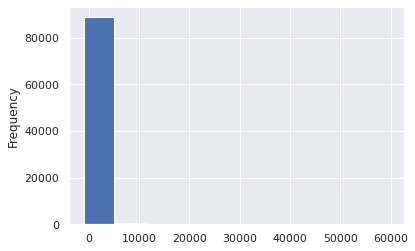

In [78]:
final.current.plot.hist(bins=10)  

In [74]:
## Splitting data to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3, random_state=41)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression().fit(X_train, y_train) ## Here I'm fitting my train data in Linear regression algo
print(reg.score(X_train, y_train)) ## I'm checking the score of my train
y_pred = reg.predict(X_test) ## Here, I'm predicting using test data
print('R squared is:',r2_score(y_test, y_pred)) ## Comparing the actual Vs Prediction results

0.8028505579010543
0.8292692491000222


In [62]:
## Root mean squared error
import math
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print('mse is:', mse )
print('rmse is:', rmse)

mse is: 213561.5927061941
rmse is: 462.12724730986605


In [64]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor().fit(X_train, y_train) ## Fitting train data in Linear regression algo

y_pred_DT = DT.predict(X_test) ## Predicting using test data
print('R squared is:',r2_score(y_test, y_pred_DT))
mse_DT = mean_squared_error(y_test, y_pred_DT)
rmse_DT = math.sqrt(mse_DT)
print('mse is:', mse_DT )
print('rmse is:', rmse_DT)

R squared is: 0.8065837936494216
mse is: 241938.09765189045
rmse is: 491.8720338176287


In [76]:
## Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

RF=RandomForestRegressor().fit(X_train, y_train)

y_pred_RF = RF.predict(X_test) # Prediction using test data
print('R squared is:',r2_score(y_test, y_pred_RF))
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = math.sqrt(mse_RF)
print('mse is:', mse_RF)
print('rmse is:', rmse_RF)

/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


R squared is: 0.876757516996191
mse is: 154160.04920390082
rmse is: 392.63220601970596


In [80]:
## KNN reggressor
from sklearn.neighbors import KNeighborsRegressor

NN=KNeighborsRegressor().fit(X_train, y_train)
y_pred_NN = NN.predict(X_test) # Predicting using test data
print('R squared is:',r2_score(y_test, y_pred_NN))
mse_NN = mean_squared_error(y_test, y_pred_NN)
rmse_NN = math.sqrt(mse_NN)
print('mse is:', mse_NN)
print('rmse is:', rmse_NN)

R squared is: 0.8606902117234034
mse is: 174258.12343168532
rmse is: 417.442359412273


In [69]:
## Clustering using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_data[['prior2', 'prior1']])
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [70]:
X_data['Cluster'] = kmeans.labels_

In [71]:
## Clustered Prior 1 and Prior2 columns to 2 clusterrs and replacing those two columns with cluster 
## Rebuild models using new df
X_train,X_test,y_train,y_test=train_test_split(X_data.drop(columns=['prior1', 'prior2']),y_data,test_size=0.3, random_state=41)

In [72]:
## Linear regression after adding clusters to df
reg2 = LinearRegression().fit(X_train, y_train) ## Fitting train data in Linear regression algo
print(reg2.score(X_train, y_train)) ## Checking the score of my train
y_pred_reg2 = reg2.predict(X_test) ## Predicting using test data
print('R squared is:',r2_score(y_test, y_pred_reg2)) ## Comparing the actual Vs Prediction results

0.5828643982315611
R squared is: 0.5741420296834572


In [73]:
## DT after adding cluster
from sklearn.tree import DecisionTreeRegressor
DT2 = DecisionTreeRegressor().fit(X_train, y_train) ## Fitting train data in Linear regression algo

y_pred_DT2 = DT2.predict(X_test) ## Predicting using test data
print('R squared is:',r2_score(y_test, y_pred_DT2))
mse_DT2 = mean_squared_error(y_test, y_pred_DT2)
rmse_DT2 = math.sqrt(mse_DT2)
print('mse is:', mse_DT2 )
print('rmse is:', rmse_DT2)

R squared is: 0.7808436596373483
mse is: 274135.60154098034
rmse is: 523.5796038244617


In [81]:
### RF regressor 
X_train,X_test,y_train,y_test=train_test_split(X_data.drop(columns=['prior1', 'prior2']),y_data,test_size=0.3, random_state=41)

In [82]:
RF=RandomForestRegressor().fit(X_train, y_train)

y_pred_RF = RF.predict(X_test) ## Predicting using test data
print('R squared is:',r2_score(y_test, y_pred_RF))
mse_RF = mean_squared_error(y_test, y_pred_RF)
rmse_RF = math.sqrt(mse_RF)
print('mse is:', mse_RF)
print('rmse is:', rmse_RF)

/home/q/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


R squared is: 0.8311492012368606
mse is: 211210.02117945813
rmse is: 459.5759144901505


In [83]:
### KNN regressor
X_train,X_test,y_train,y_test=train_test_split(X_data.drop(columns=['prior1', 'prior2']),y_data,test_size=0.3, random_state=41)

In [84]:
NN=KNeighborsRegressor().fit(X_train, y_train)
y_pred_NN = NN.predict(X_test) ## Predicting using test data
print('R squared is:',r2_score(y_test, y_pred_NN))
mse_NN = mean_squared_error(y_test, y_pred_NN)
rmse_NN = math.sqrt(mse_NN)
print('mse is:', mse_NN)
print('rmse is:', rmse_NN)

R squared is: 0.78081714636564
mse is: 274168.766137891
rmse is: 523.6112738834898


# modeling kmeans, Kelbow, OLS

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['capacity_mw','latitude','longitude','prior2','prior1']
# Separating out the features
x = final.loc[:, features].values
# Separating out the target
y = final.loc[:,['current']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['prior2', 'prior1'])

In [132]:
finalDf = pd.concat([principalDf, final[['current']]], axis = 1)


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(finalDf)
kmeans.labels_

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [ ]:
X = final.exog
y = final.endog

In [ ]:
 model = sm.OLS(y,x)

In [ ]:
fit = model.fit()

In [ ]:
fit.pvalues

In [ ]:
fit.summary()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=41)

In [ ]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 